In [2]:
# visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# stats library
from scipy import stats

In [4]:
# standard libraries
import numpy as np
import pandas as pd
from numpy.random import randn

In [5]:
%matplotlib inline

In [7]:
dataset1 = randn(100)

(array([  2.,   5.,  12.,  22.,  24.,  17.,   9.,   6.,   2.,   1.]),
 array([-2.64526966, -2.07173091, -1.49819216, -0.9246534 , -0.35111465,
         0.2224241 ,  0.79596286,  1.36950161,  1.94304036,  2.51657911,
         3.09011787]),
 <a list of 10 Patch objects>)

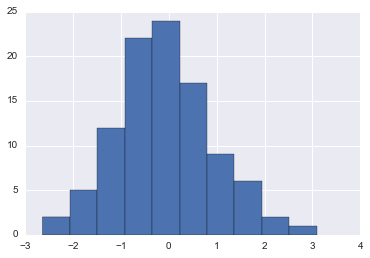

In [8]:
plt.hist(dataset1)

(array([  4.,   5.,   9.,  12.,  20.,   9.,  11.,   6.,   3.,   1.]),
 array([-2.19829489, -1.75459669, -1.31089849, -0.86720029, -0.42350209,
         0.02019611,  0.4638943 ,  0.9075925 ,  1.3512907 ,  1.7949889 ,
         2.2386871 ]),
 <a list of 10 Patch objects>)

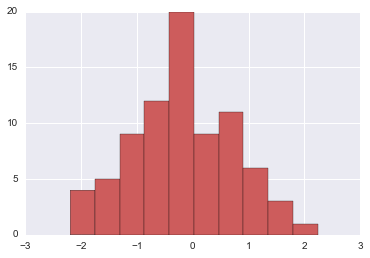

In [9]:
dataset2 = randn(80)

plt.hist(dataset2, color = 'indianred')

(array([ 0.11268921,  0.14086151,  0.25355073,  0.33806763,  0.56344606,
         0.25355073,  0.30989533,  0.16903382,  0.08451691,  0.0281723 ]),
 array([-2.19829489, -1.75459669, -1.31089849, -0.86720029, -0.42350209,
         0.02019611,  0.4638943 ,  0.9075925 ,  1.3512907 ,  1.7949889 ,
         2.2386871 ]),
 <a list of 10 Patch objects>)

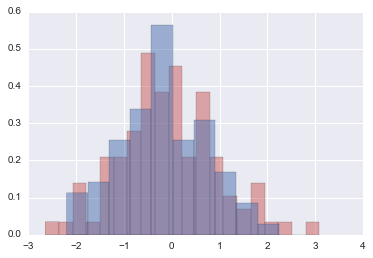

In [10]:
plt.hist(dataset1,normed=True,color='indianred',alpha=0.5,bins=20)
plt.hist(dataset2,normed=True,alpha=0.5)

In [11]:
data1 = randn(1000)
data2 = randn(1000)

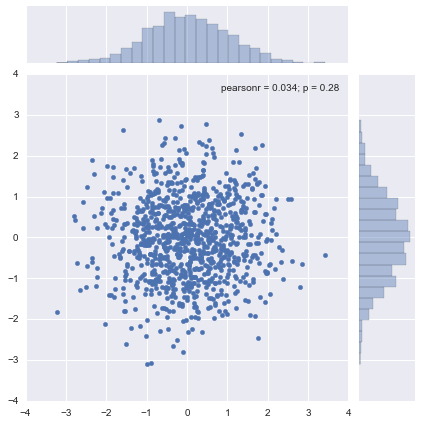

In [12]:
sns.jointplot(data1,data2)

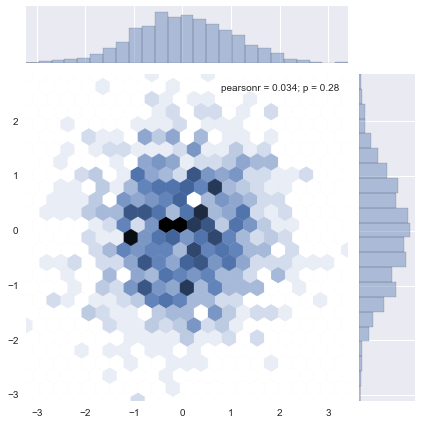

In [13]:
sns.jointplot(data1,data2,kind='hex')

## Kernel Density Estimation

In [14]:
dataset = randn(25)

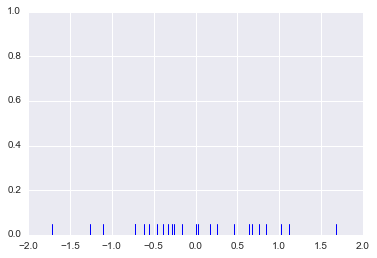

In [16]:
sns.rugplot(dataset)


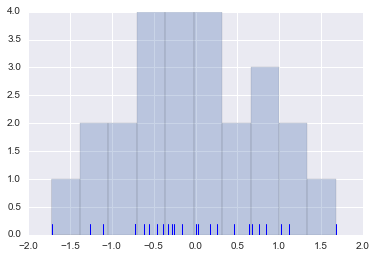

In [17]:
plt.hist(dataset, alpha = 0.3)
sns.rugplot(dataset)

(0, 1)

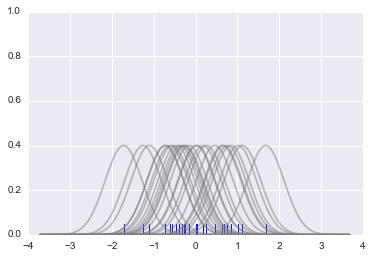

In [21]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis =  np.linspace(x_min,x_max,1000)

bandwidth = ( (4*dataset.std()**5) / (3*len(dataset)))**0.2

kernel_list = []

for data_point in dataset:
    
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #scale for plotting
    
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis,kernel,color = 'grey', alpha = 0.5)
    
    
plt.ylim(0,1)


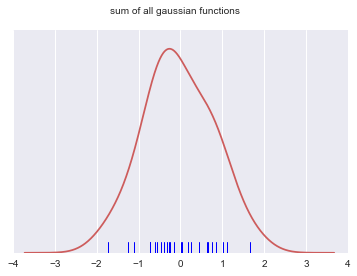

In [23]:
sum_of_kde = np.sum(kernel_list, axis =0)

fig = plt.plot(x_axis, sum_of_kde, color = 'indianred')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle('sum of all gaussian functions')

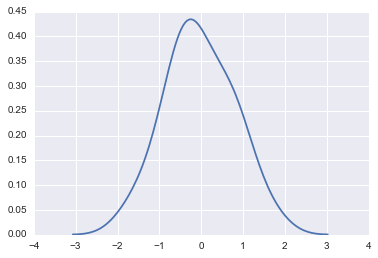

In [24]:
sns.kdeplot(dataset)

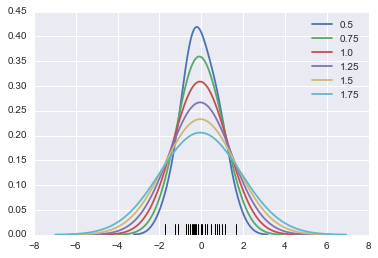

In [25]:
sns.rugplot(dataset, color='black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

In [26]:
url = 'http://en.wikipedia.org/wiki/kernel_(statistics)'

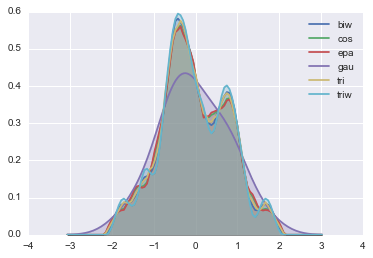

In [28]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True)

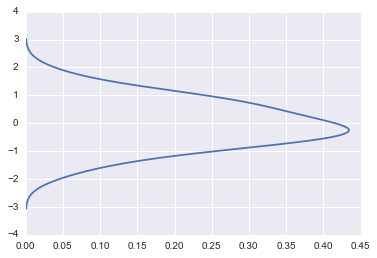

In [29]:
sns.kdeplot(dataset, vertical = True)

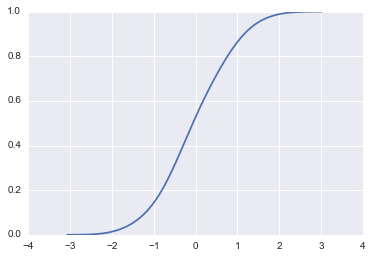

In [30]:
sns.kdeplot(dataset, cumulative=True)

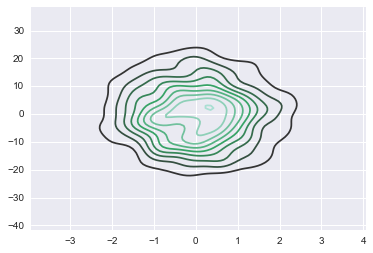

In [31]:
mean = [0,0]

cov = [[1,0],[0,100]]

dataset2 = np.random.multivariate_normal(mean,cov,1000)

dframe = pd.DataFrame(dataset2,columns = ['X','Y'])

sns.kdeplot(dframe)

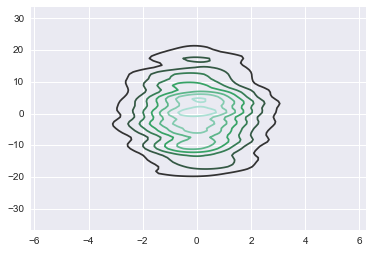

In [32]:
sns.kdeplot(dframe,bw=1)

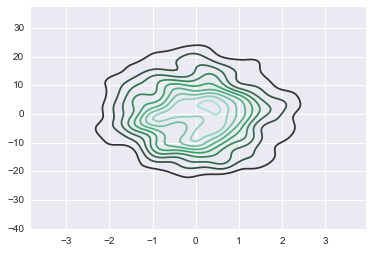

In [33]:
sns.kdeplot(dframe,bw='silverman')

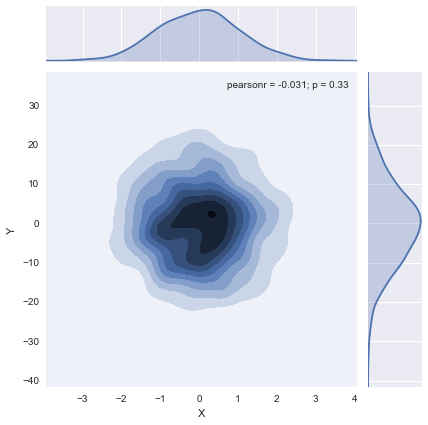

In [34]:
sns.jointplot('X','Y',dframe,kind='kde')

## Combining plot styles

In [35]:
dataset = randn(100)

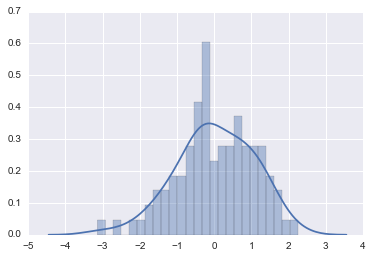

In [36]:
sns.distplot(dataset,bins=25)

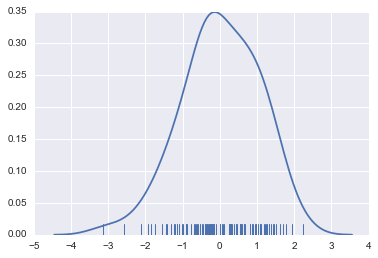

In [37]:
sns.distplot(dataset,bins=25,rug=True,hist=False)

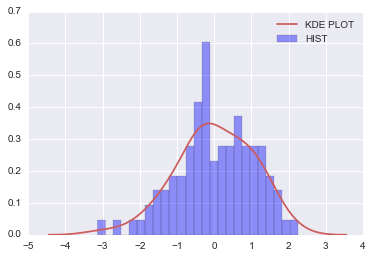

In [39]:
sns.distplot(dataset,bins=25,kde_kws={'color':'indianred','label':'KDE PLOT'},
            hist_kws={'color':'blue','label':'HIST'})

In [43]:
from pandas import Series

ser1 = Series(dataset,name = 'my_data')
ser1

0     1.279940
1    -0.386171
2    -0.538401
3    -0.304334
4    -0.321389
5     1.188850
6     1.116535
7    -0.462702
8    -0.899266
9    -0.695408
10   -0.627883
11    0.813763
12   -1.241593
13    0.118114
14    1.324851
15   -1.420415
16   -1.322977
17   -1.093367
18    0.425026
19   -0.003232
20   -0.620921
21   -0.352709
22    0.819250
23    0.801968
24   -0.873532
25    0.425423
26    0.576896
27    1.209154
28   -2.106834
29   -0.587869
        ...   
70   -0.232944
71   -0.187149
72   -1.022305
73   -0.545802
74   -2.572206
75    0.673139
76   -1.543042
77    1.468066
78    0.242497
79    1.611449
80    0.982832
81    0.259497
82    1.035988
83   -0.411365
84    0.057857
85    0.637455
86    2.243135
87   -0.224481
88    0.890882
89    0.552526
90    0.261999
91   -0.916412
92    0.013411
93   -0.100202
94   -1.452883
95   -1.159542
96    1.087261
97   -0.207856
98   -1.939528
99   -0.198236
Name: my_data, dtype: float64

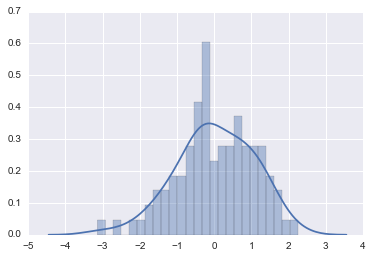

In [44]:
sns.distplot(dataset,bins=25)

## BOX and Violin plots

In [45]:
data1 = randn(100)
data2 = randn(100)

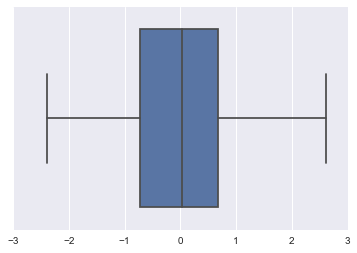

In [51]:
sns.boxplot([data1,data2])

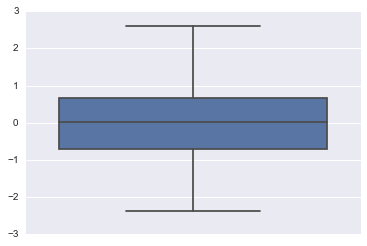

In [54]:
sns.boxplot([data1,data2],vert=True)

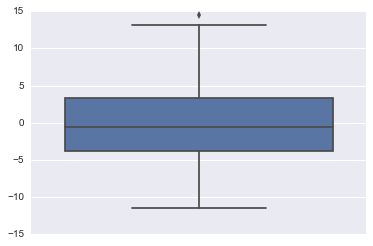

In [56]:
#normal distribution
data1 = stats.norm(0,5).rvs(100)

# Two gamma distributions, concatenated together
data2 = np.concatenate([stats.gamma(5).rvs(50)-1,
                      -1*stats.gamma(5).rvs(50)])

# box plot both data1 and data2

sns.boxplot([data1,data2],vert=True)

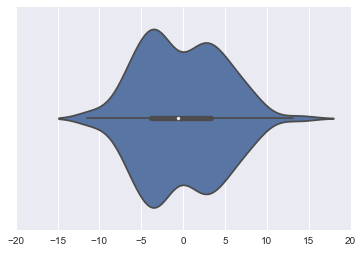

In [57]:
sns.violinplot([data1,data2])

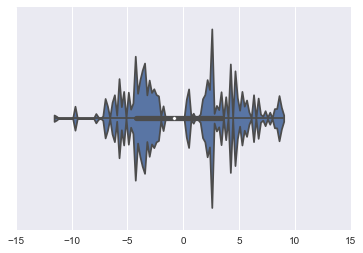

In [58]:
sns.violinplot([data2],bw=0.01)

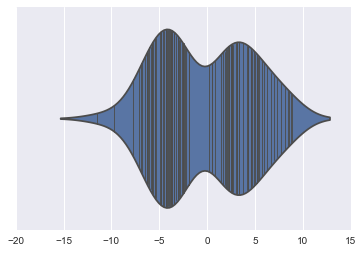

In [59]:
sns.violinplot([data2],inner='stick')

## Regression plots sns.lmplot

In [60]:
tips = sns.load_dataset('tips')

In [61]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


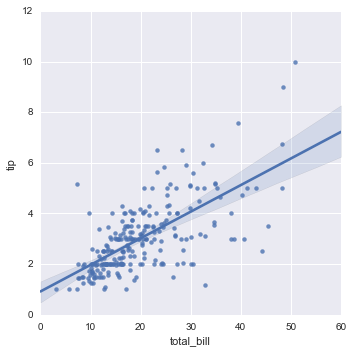

In [62]:
sns.lmplot('total_bill','tip', tips)

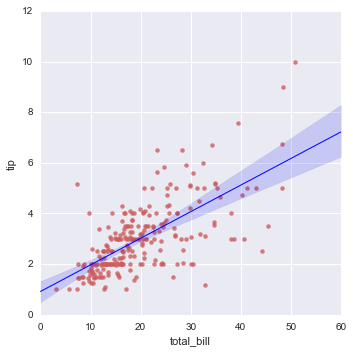

In [63]:
sns.lmplot('total_bill','tip',tips,
          scatter_kws ={'marker':'o','color':'indianred'},
           line_kws = {'linewidth':1,'color':'blue'})

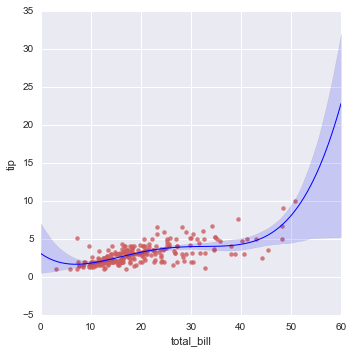

In [64]:
sns.lmplot('total_bill','tip',tips,order=4,
          scatter_kws ={'marker':'o','color':'indianred'},
           line_kws = {'linewidth':1,'color':'blue'})

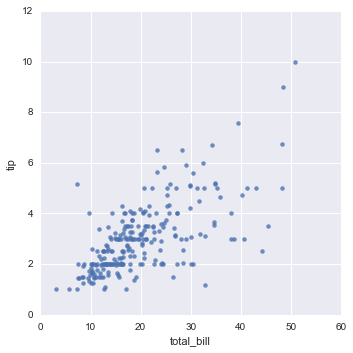

In [65]:
sns.lmplot('total_bill','tip',tips,fit_reg=False)

In [66]:
tips['tips_pect'] = 100 * (tips['tip']/tips['total_bill'])

In [68]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tips_pect
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


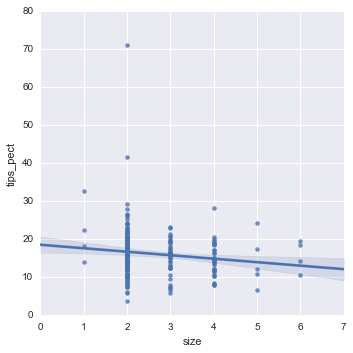

In [69]:
sns.lmplot('size','tips_pect',tips)

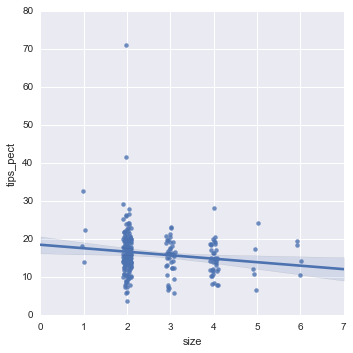

In [72]:
sns.lmplot('size','tips_pect',tips,x_jitter =.1)

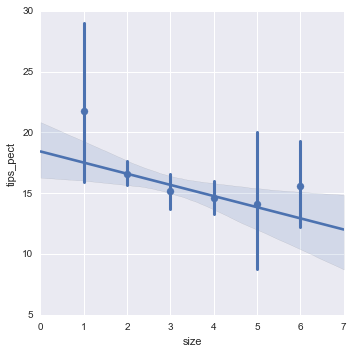

In [73]:
sns.lmplot('size','tips_pect',tips,x_estimator = np.mean)

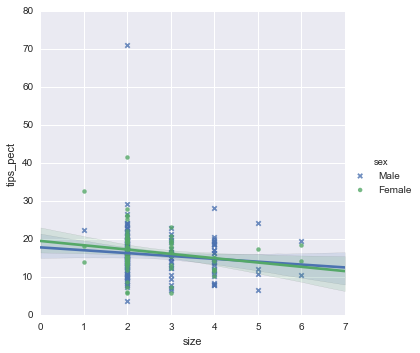

In [74]:
sns.lmplot('size','tips_pect',tips,hue='sex',markers=['x','o'])

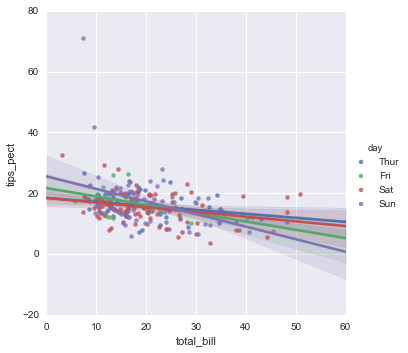

In [75]:
sns.lmplot('total_bill','tips_pect',tips,hue='day')

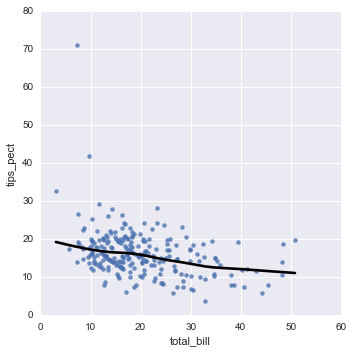

In [79]:
sns.lmplot('total_bill','tips_pect',tips,lowess = True,line_kws={'color':'black'})

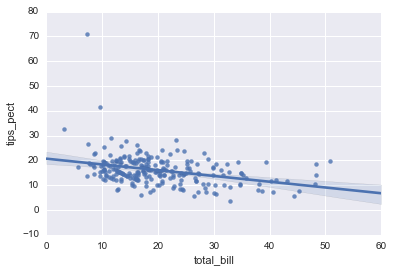

In [80]:
sns.regplot('total_bill','tips_pect',tips)

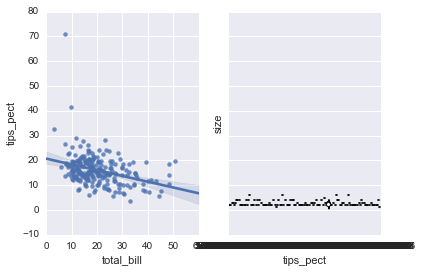

In [86]:
fig, (axis1,axis2) = plt.subplots(1,2,sharey= True)
sns.regplot('total_bill','tips_pect',tips,ax=axis1)
sns.violinplot(tips['tips_pect'],tips['size'],color = 'black',ax=axis2)

## HEATmap

In [6]:
flight_dframe = sns.load_dataset('flights')

In [7]:
flight_dframe

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


In [8]:
flight_dframe = flight_dframe.pivot('month','year','passengers')

In [9]:
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


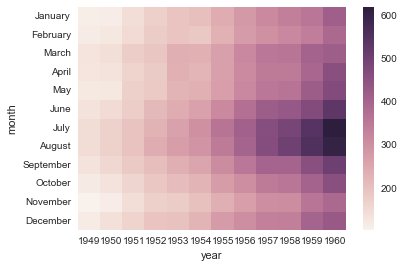

In [93]:
sns.heatmap(flight_dframe)

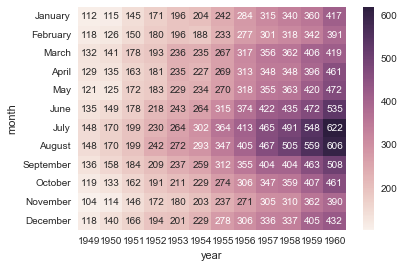

In [94]:
sns.heatmap(flight_dframe,annot=True,fmt='d')

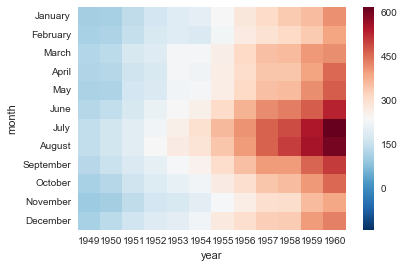

In [98]:
sns.heatmap(flight_dframe,center = flight_dframe.loc['January',1955])

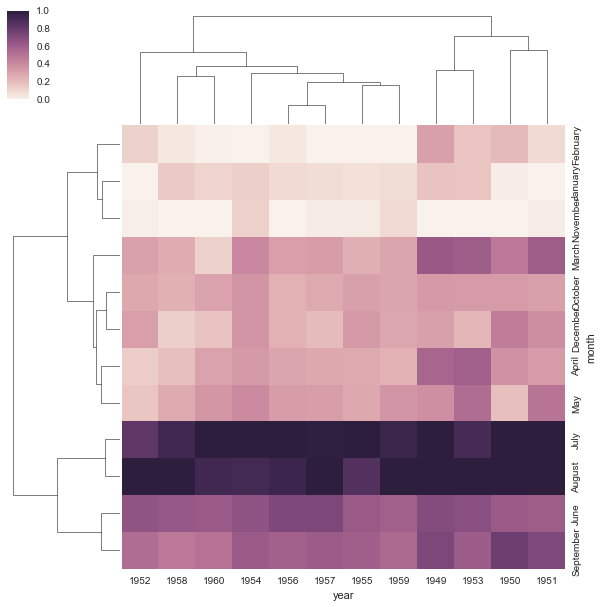

In [10]:
sns.clustermap(flight_dframe,standard_scale = 1)